In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px



In [2]:
data = pd.read_csv('df_merged_final.csv')
data

,Unnamed: 0,id,fecha_alta,id_municipio,id_estado,tipo_persona,genero,actividad_empresarial,fecha,comercio,giro_comercio,tipo_venta,edad,antiguedad_dias,monto
0,0,Usuario 1,2015-10-25,117,21,1,0,12,2022-01-02,25,72,0,40.0,2261,131.90
1,1,Usuario 1,2015-10-25,117,21,1,0,12,2022-01-02,6,22,0,40.0,2261,2.54
2,2,Usuario 1,2015-10-25,117,21,1,0,12,2022-01-02,6,22,0,40.0,2261,47.80
3,3,Usuario 1,2015-10-25,117,21,1,0,12,2022-01-02,59,74,1,40.0,2261,17.01
4,4,Usuario 1,2015-10-25,117,21,1,0,12,2022-01-04,59,74,1,40.0,2263,6.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346006,346006,Usuario 1000,2018-10-12,130,24,1,1,20,2023-01-27,44,4,0,36.0,1568,34.59
346007,346007,Usuario 1000,2018-10-12,130,24,1,1,20,2023-01-27,6,22,0,36.0,1568,190.83
346008,346008,Usuario 1000,2018-10-12,130,24,1,1,20,2023-01-27,77,22,0,36.0,1568,23.10
346009,346009,Usuario 1000,2018-10-12,130,24,1,1,20,2023-01-27,6,22,0,36.0,1568,56.52


Se vuelve a revisar si existen columnas con datos nulos. 

In [3]:
# Mostrar la cantidad de valores nulos por cada columna
nulos_por_columna = data.isnull().sum()

# Mostrar solo las columnas que tienen al menos un nulo
nulos_con_valores = nulos_por_columna[nulos_por_columna > 0]

print("Cantidad de valores nulos por columna:")
print(nulos_con_valores)


Cantidad de valores nulos por columna:
Series([], dtype: int64)


Para la columna de edad, se van a imputar nulos con la media de la columna. 


In [5]:
media_edad = data['edad'].mean()
data['edad'].fillna(media_edad, inplace=True)
print(data.isnull().sum())

Unnamed: 0               0
id                       0
fecha_alta               0
id_municipio             0
id_estado                0
tipo_persona             0
genero                   0
actividad_empresarial    0
fecha                    0
comercio                 0
giro_comercio            0
tipo_venta               0
edad                     0
antiguedad_dias          0
monto                    0
dtype: int64


/var/folders/qy/0tzg7tk54c1g29r191p_gzhh0000gn/T/ipykernel_77101/3859803864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['edad'].fillna(media_edad, inplace=True)


La base de datos, ya se encuentra lista, sin datos nulos. 

## Preprocesamiento

In [6]:
from sklearn.preprocessing import LabelEncoder

categoricas = ['tipo_persona', 'genero', 'actividad_empresarial', 'comercio', 'giro_comercio', 'tipo_venta', 'id_municipio', 'id_estado']

data_encoded = data.copy()  # Para no modificar el dataframe original

le = LabelEncoder()

for col in categoricas:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Asegurar que 'monto' sea la última columna
columnas = [col for col in data_encoded.columns if col != 'monto'] + ['monto']
data_encoded = data_encoded[columnas]

data_encoded

,Unnamed: 0,id,fecha_alta,id_municipio,id_estado,tipo_persona,genero,actividad_empresarial,fecha,comercio,giro_comercio,tipo_venta,edad,antiguedad_dias,monto
0,0,Usuario 1,2015-10-25,117,21,1,0,12,2022-01-02,25,72,0,40.0,2261,131.90
1,1,Usuario 1,2015-10-25,117,21,1,0,12,2022-01-02,6,22,0,40.0,2261,2.54
2,2,Usuario 1,2015-10-25,117,21,1,0,12,2022-01-02,6,22,0,40.0,2261,47.80
3,3,Usuario 1,2015-10-25,117,21,1,0,12,2022-01-02,59,74,1,40.0,2261,17.01
4,4,Usuario 1,2015-10-25,117,21,1,0,12,2022-01-04,59,74,1,40.0,2263,6.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346006,346006,Usuario 1000,2018-10-12,130,24,1,1,20,2023-01-27,44,4,0,36.0,1568,34.59
346007,346007,Usuario 1000,2018-10-12,130,24,1,1,20,2023-01-27,6,22,0,36.0,1568,190.83
346008,346008,Usuario 1000,2018-10-12,130,24,1,1,20,2023-01-27,77,22,0,36.0,1568,23.10
346009,346009,Usuario 1000,2018-10-12,130,24,1,1,20,2023-01-27,6,22,0,36.0,1568,56.52


In [ ]:
data_encoded.to_csv('df_merged_clean.csv', index=False)

Ahora se agrupará el conjunto de datos por usuario, con el objetivo de sumar el gasto total registrado en todos los registros asociados a cada uno. Como resultado, se generará una nueva columna denominada **`gasto_total_año`**, la cual representa el monto total acumulado por cada usuario durante el año.



In [7]:
data_agg = data_encoded.groupby('id', as_index=False)['monto'].sum()


data_agg = data_encoded.groupby('id', as_index=False)['monto'].sum()
data_agg = data_encoded.groupby('id', as_index=False).agg({
    'edad': 'first',           # Conservar la primera edad que aparezca
    'tipo_persona': 'first', 
    'id_municipio': 'first', 
    'id_estado': 'first', 
    'tipo_persona': 'first',
    'genero': 'first', 
    'actividad_empresarial': 'first', 
    'comercio': 'first', 
    'giro_comercio': 'first',
    'tipo_venta': 'first', 
    'edad': 'first', 
    'antiguedad_dias': 'first', 
    'monto': 'sum',            # Sumar todos los montos por usuario

})
data_agg.rename(columns={'monto': 'gasto_total_año'}, inplace=True)

data_agg.head()

,id,edad,tipo_persona,id_municipio,id_estado,genero,actividad_empresarial,comercio,giro_comercio,tipo_venta,antiguedad_dias,gasto_total_año
0,Usuario 1,40.0,1,117,21,0,12,25,72,0,2261,11396.81
1,Usuario 10,33.0,1,79,14,0,12,6,22,0,190,10236.35
2,Usuario 100,44.0,1,151,29,1,11,88,22,0,736,39067.09
3,Usuario 1000,36.0,1,130,24,1,20,7,51,0,1179,20226.34
4,Usuario 101,37.0,1,27,8,1,22,83,64,0,769,11057.33


Cómo se visualiza el gasto total por año.

<Axes: >

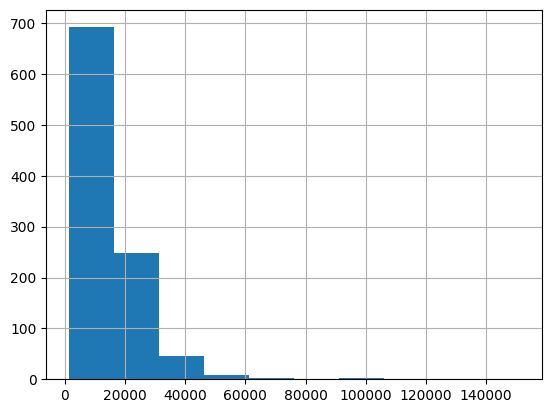

In [8]:
data_agg['gasto_total_año'].hist()

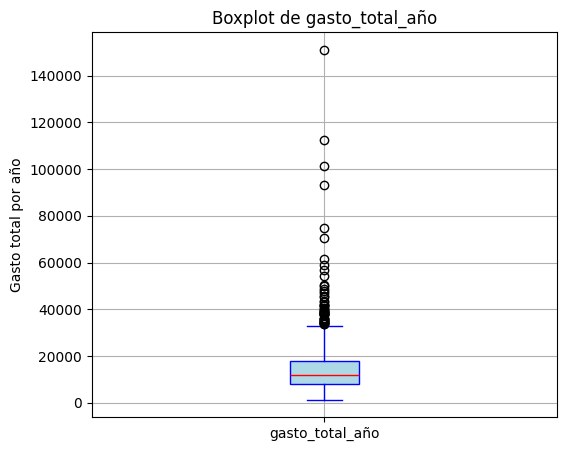

In [9]:
plt.figure(figsize=(6, 5))
data_agg['gasto_total_año'].plot.box(
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue')
)
plt.title('Boxplot de gasto_total_año')
plt.ylabel('Gasto total por año')
plt.grid(True)
plt.show()

Existen valores outliers que deben ser eliminados para no sesgar el modelo. 

Filas antes: 1000
Filas después de eliminar outliers: 949


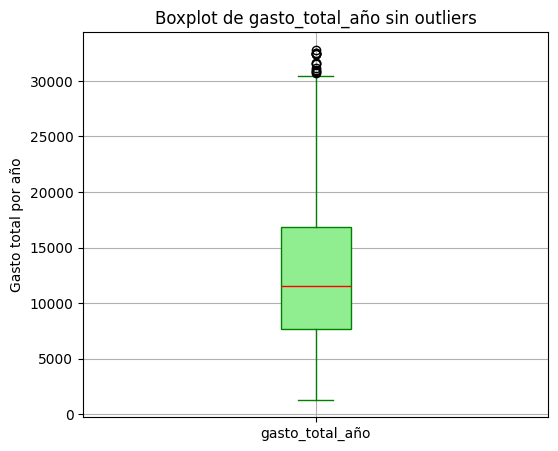

In [ ]:
Q1 = data_agg['gasto_total_año'].quantile(0.25)
Q3 = data_agg['gasto_total_año'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar datos sin outliers
df = data_agg[
    (data_agg['gasto_total_año'] >= lower_bound) & 
    (data_agg['gasto_total_año'] <= upper_bound)
].copy()

print(f"Filas antes: {data_agg.shape[0]}")
print(f"Filas después de eliminar outliers: {df.shape[0]}")

plt.figure(figsize=(6, 5))
df['gasto_total_año'].plot.box(
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='green'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='green'),
    capprops=dict(color='green')
)
plt.title('Boxplot de gasto_total_año sin outliers')
plt.ylabel('Gasto total por año')
plt.grid(True)
plt.show()

Filas después de cortar al p95: 900


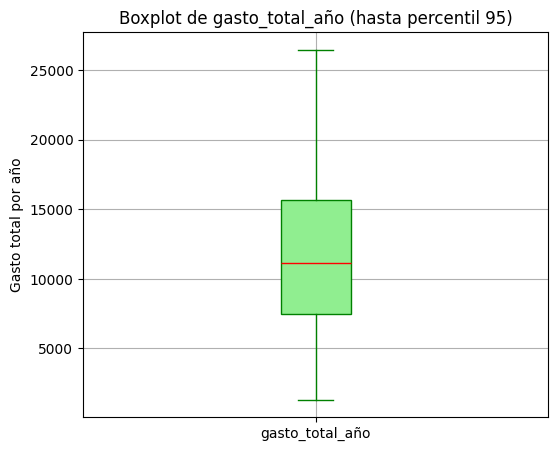

In [11]:
# Cortar por percentil 95
percentile_95 = data_agg['gasto_total_año'].quantile(0.90)

df = data_agg[data_agg['gasto_total_año'] <= percentile_95].copy()

print(f"Filas después de cortar al p95: {df.shape[0]}")

# Nuevo boxplot
plt.figure(figsize=(6, 5))
df['gasto_total_año'].plot.box(
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='green'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='green'),
    capprops=dict(color='green')
)
plt.title('Boxplot de gasto_total_año (hasta percentil 95)')
plt.ylabel('Gasto total por año')
plt.grid(True)
plt.show()


# Predicción de monto del próximo gasto 

## ¿Según las características de un usuario, cuánto será el monto de un próximo gasto?

### Experimentación

**Random Forest Regressor**

RMSE: 5507.7656


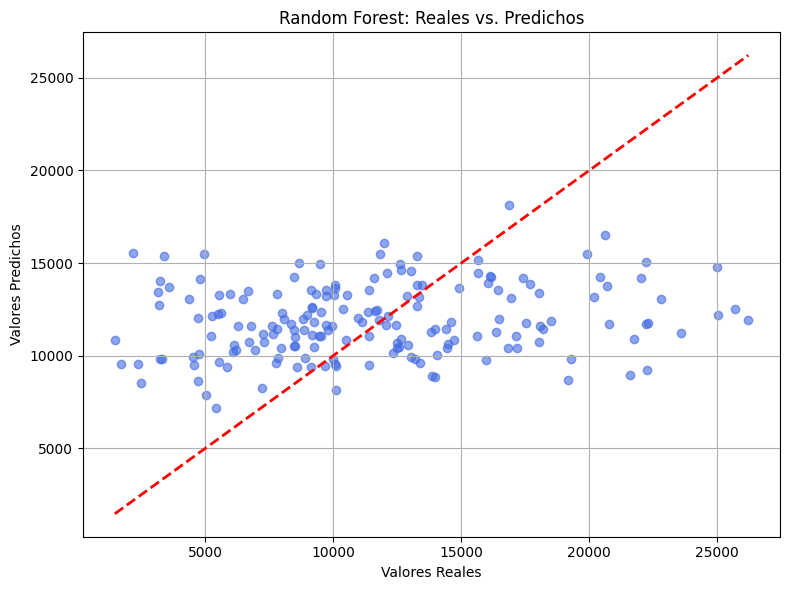

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['id', 'gasto_total_año']) 
y = df['gasto_total_año']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Random Forest: Reales vs. Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()


RMSE: 5571.1347


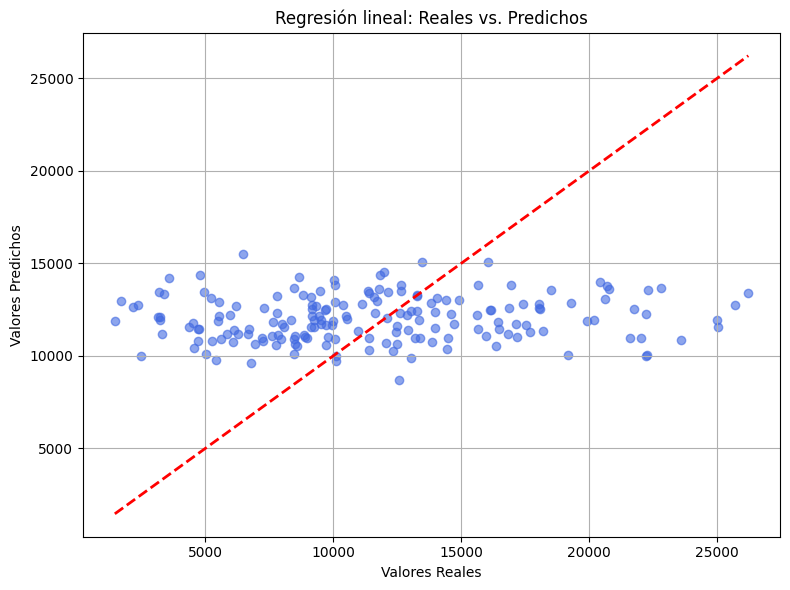

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['id', 'gasto_total_año']) 
y = df['gasto_total_año']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = LinearRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión lineal: Reales vs. Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()

1er entrenamiento

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RMSE: 5883.9277


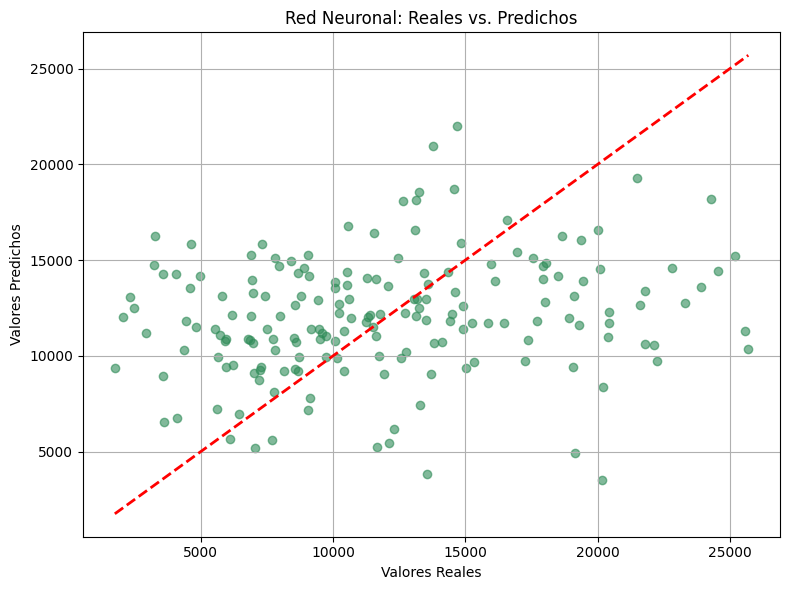

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame ya se llama df y está limpio
X = df.drop(columns=['id', 'gasto_total_año']).values
y = df['gasto_total_año'].values

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Normalizar características (opcional pero recomendado)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir el modelo
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=3, verbose=0)

# Predecir
y_pred = model.predict(X_test).flatten()

# Evaluar con RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

# Graficar resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Red Neuronal: Reales vs. Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()


2do experimento

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RMSE: 6179.45


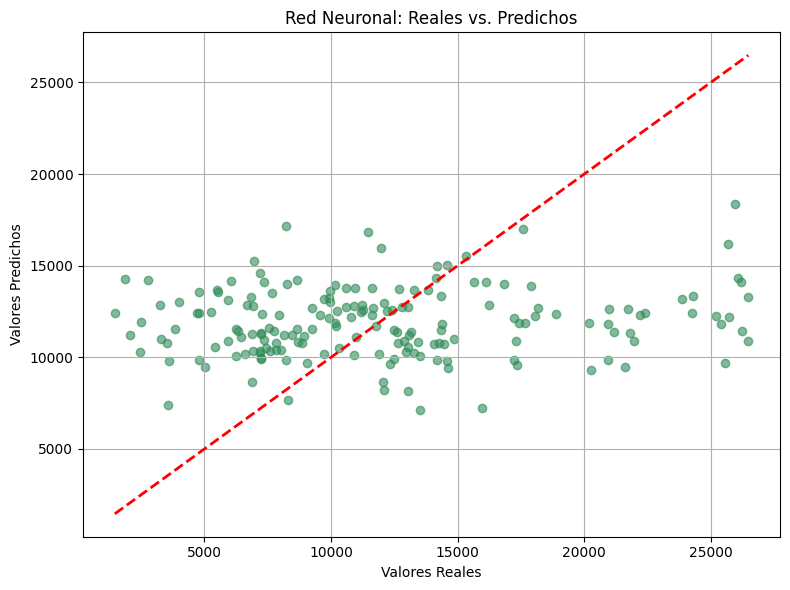

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Separar variables
X = df.drop(columns=['id', 'gasto_total_año']).values
y = df['gasto_total_año'].values

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Normalizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construcción del modelo con regularización
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # regresión
])

# Compilación
model.compile(optimizer='adam', loss='mse')

# Callback para detener cuando no hay mejora
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento con validación
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=0)

# Predicciones
y_pred = model.predict(X_test).flatten()

# Evaluaciones
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Red Neuronal: Reales vs. Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()



Cómo se puede notar para las experimentaciones anteriores, no se logra obtener un modelo que satisfaga un comportamiento adecuado para la predicción. 
